In [1]:
!pip install treetaggerwrapper
import os, treetaggerwrapper, networkx as nx
!pip install HanTa
import pandas as pd
import numpy as np
from HanTa import HanoverTagger as ht
import nltk
from nltk.stem.snowball import GermanStemmer
from nltk.stem import PorterStemmer
from nltk import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

H:\anaconda\lib\site-packages\treetaggerwrapper.py:739: FutureWarning: Possible nested set at position 8
  punct2find_re = re.compile("([^ ])([[" + ALONEMARKS + "])",
H:\anaconda\lib\site-packages\treetaggerwrapper.py:2043: FutureWarning: Possible nested set at position 152
  DnsHostMatch_re = re.compile("(" + DnsHost_expression + ")",
H:\anaconda\lib\site-packages\treetaggerwrapper.py:2067: FutureWarning: Possible nested set at position 409
  UrlMatch_re = re.compile(UrlMatch_expression, re.VERBOSE | re.IGNORECASE)
H:\anaconda\lib\site-packages\treetaggerwrapper.py:2079: FutureWarning: Possible nested set at position 192
  EmailMatch_re = re.compile(EmailMatch_expression, re.VERBOSE | re.IGNORECASE)


In [2]:
df = pd.read_csv('G:/Extractive-Summarisation-of-German-Wikipedia/dataset/data_train.csv', encoding='utf-8')
df.head()

,source,summary
0,Minghella war der Sohn italienisch-schottische...,"Anthony Minghella, CBE war ein britischer Film..."
1,Ende der 1940er Jahre wurde eine erste Auteur-...,Die Auteur-Theorie ist eine Filmtheorie und di...
2,"Al Pacino, geboren in Manhattan, ist der Sohn ...","Alfredo James ""Al"" Pacino ist ein US-amerikani..."
3,Der Name der Alkalimetalle leitet sich von dem...,Als Alkalimetalle werden die chemischen Elemen...
4,Die Arbeit ist bereits seit dem Altertum Gegen...,Das deutsche Arbeitsrecht ist ein Rechtsgebiet...


In [35]:
stopword_list = nltk.corpus.stopwords.words('german')

def remove_stopwords(text):
    filtered_words = [word for word in nltk.word_tokenize(text) if word not in stopword_list]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

df['filtered_text'] = df["source"].apply(remove_stopwords)

In [36]:
def identify_tokens(row):
    tokens = word_tokenize(row, language='german')
    return tokens

df['word_token'] = df['filtered_text'].apply(identify_tokens)

df.head()

,source,summary,word_token,filtered_text
0,Minghella war der Sohn italienisch-schottische...,"Anthony Minghella, CBE war ein britischer Film...","[Minghella, Sohn, italienisch-schottischer, El...",Minghella Sohn italienisch-schottischer Eltern...
1,Ende der 1940er Jahre wurde eine erste Auteur-...,Die Auteur-Theorie ist eine Filmtheorie und di...,"[Ende, 1940er, Jahre, wurde, erste, Auteur-The...",Ende 1940er Jahre wurde erste Auteur-Theorie f...
2,"Al Pacino, geboren in Manhattan, ist der Sohn ...","Alfredo James ""Al"" Pacino ist ein US-amerikani...","[Al, Pacino, ,, geboren, Manhattan, ,, Sohn, S...","Al Pacino , geboren Manhattan , Sohn Salvatore..."
3,Der Name der Alkalimetalle leitet sich von dem...,Als Alkalimetalle werden die chemischen Elemen...,"[Der, Name, Alkalimetalle, leitet, arabischen,...",Der Name Alkalimetalle leitet arabischen Wort ...
4,Die Arbeit ist bereits seit dem Altertum Gegen...,Das deutsche Arbeitsrecht ist ein Rechtsgebiet...,"[Die, Arbeit, bereits, seit, Altertum, Gegenst...",Die Arbeit bereits seit Altertum Gegenstand re...


In [25]:
import nltk
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_documents(df['word_token'])

#top 10 ngrams with  highest PMI
finder.apply_freq_filter(5)

finder.nbest(bigram_measures.pmi, 10)

[('Adhamjon', 'Achilov'),
 ('Aukusti', 'Sihvola'),
 ('Carolee', 'Carmello'),
 ('Cerastes', 'gasperettii'),
 ('Chrysi', 'Avgi'),
 ('Darss-Zingster', 'Boddenkette'),
 ('FRB', '121102'),
 ('Forenede', 'Dampskibs-Selskab'),
 ('Hafsia', 'Herzi'),
 ('Hayata', 'Bunzō')]

In [33]:
import nltk
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_documents(df['word_token'])

#top 10 ngrams with  highest PMI
finder.apply_freq_filter(3)

finder.nbest(bigram_measures.pmi, 40)

[('536к', 'Kaliningrad–Mosyr'),
 ('AGM-88', 'HARM'),
 ('Abdelmalik', 'Ladjali'),
 ('Abdurrahim', 'Kuzu'),
 ('Ahrue', 'Luster'),
 ('Al-Abidyn', 'S-Latef'),
 ('Alasdair', 'MacColla'),
 ('Aleksandre', 'Iaschwili'),
 ('Alephis', 'tigneresi'),
 ('Alexis-Armand', 'Charost'),
 ('Aloizs', 'Tumiņš'),
 ('Anvar', 'Yunusow'),
 ('Apti', 'Auchadow'),
 ('Ariada-Akpars', 'Wolschsk'),
 ('Arnaldur', 'Indriðason'),
 ('Arutik', 'Rubenjan'),
 ('Astrit', 'Ajdarevic'),
 ('Aviron', 'Bayonnais'),
 ('Államvédelmi', 'Hatóság'),
 ('Äbdulchakim', 'Schäpijew'),
 ('Badain', 'Jaran'),
 ('Banderia', 'Prutenorum'),
 ('Baroner', 'Kritzli'),
 ('Basílio', 'Krevey'),
 ('Bathys', 'Ryax'),
 ('Batrachochytrium', 'dendrobatidis'),
 ('Bärenthorener', 'Kiefernwirtschaft'),
 ('Beirami', 'Baher'),
 ('Benegal', 'Narsing'),
 ('Benthem', 'Crouwel'),
 ('Bereza', 'Kartuska'),
 ('Berkant', 'Göktan'),
 ('Bjarke', 'Ingels'),
 ('Blutgerinnungsvorstufe', 'Fibrinogen'),
 ('Blutjunge', 'Verführerinnen'),
 ('Bosansko', 'Grahovo'),


In [32]:
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder = TrigramCollocationFinder.from_documents(df['word_token'])

#top 10 ngrams with  highest PMI
finder.apply_freq_filter(1)

finder.nbest(trigram_measures.pmi, 40)

[("'Abd", 'or-Rahmān', 'Dschāmi'),
 ("'Alleen", 'Gezamenlijk', 'Oefenen'),
 ("'Lux", 'Aurumque', 'reimagined'),
 ('+XPE', 'ADIVVA', 'HLOTARIVM'),
 ('-//Apple', 'Computer//DTD', 'PLIST'),
 ('-127', 'mm/L', '38-Mk.12-Kanone'),
 ('-76', 'mm-/L', '50-Mk.17-Kanonen'),
 ('-Resko', '-Świdwin', '-Buślary'),
 ('.22-kalibrigen', 'achtschüssigen', 'Iver-Johnson-Revolver'),
 ('0000ULOBNN', '0001000144593923269836616847', '00010001'),
 ('08-09', 'F/W', 'SFAA'),
 ('10,5cm', 'hrubý', 'kanón'),
 ('100-Meter-Sprinterin', 'Jabou', 'Jawo'),
 ('1135/36', 'Volodar', 'Gļebovič'),
 ('171n', 'Herlasgrün–Falkenstein–Klingenthal', '–Falkenau'),
 ('20-bar-Heissdampfsammelschiene', 'hängenenden', 'Drehstromturbosätze'),
 ('260-tägigen', 'Ritualkalender', 'tonalpohualli'),
 ('28-cm-Doppeltürme', 'Drh', 'LC/1907'),
 ('3-bus', 'triticis', 'siliginis'),
 ('400-Meter-Läuferin', 'Tonique', 'Williams-Darling'),
 ('7.5-minute', 'topographic', 'quadrangle'),
 ('A/L', 'Namdal', 'Kornsilo'),
 ('ABELS', 'KALLW

In [18]:
def remove_stopwords(text):
    filtered_words = [word for word in nltk.word_tokenize(text) if word not in stopword_list]
    filtered_text = ' '.join(filtered_words)
    return filtered_text
#df['text_lemmatized'] = df['source'].apply(lemmatize_text)

df['text_clean'] = df['source'].apply(lemmatize_text)

['minghella', 'war', 'der', 'sohn', 'italienisch-schott', 'elt', ',', 'die', 'auf', 'der', 'isl', 'of', 'wight', 'ein', 'fabrik', 'für', 'eiscrem', 'betrieb', '.', 'nach', 'sein', 'schulabschluss', 'studiert', 'er', 'an', 'der', 'universität', 'hull', ',', 'wo', 'er', 'ein', 'zeit', 'lang', 'als', 'dozent', 'tätig', 'war', '.', '1978', 'dreht', 'er', 'ein', 'erst', 'kurzfilm', '.', 'seit', '1981', 'war', 'er', 'als', 'autor', 'und', 'story', 'editor', 'tätig', '.', 'er', 'wurd', 'mit', 'theaterstück', ',', 'rundfunkhörspiel', ',', 'der', 'fernsehseri', '``', 'inspector', 'mors', "''", 'und', 'viel', 'drehbüch', 'für', 'film', 'und', 'fernseh', 'bekannt', '.', 'er', 'entwickelt', 'die', 'drehbüch', 'für', 'die', '1988', 'erfolgreich', 'ausgestrahlt', 'fernsehseri', 'the', 'storytell', 'von', 'muppets-erfind', 'jim', 'henson', '.', 'auch', 'als', 'produzent', 'war', 'er', 'erfolgreich', ',', 'darunt', 'für', 'die', 'film', '``', 'der', 'still', 'amerikan', "''", ',', '``', 'di

In [ ]:
def finder(df, col, repetition, top_n):
    print("You can pick following:\n1: bigrams\n 2: trigrams")
    option = int(input(" \nyour option : "))
    def bigram():
        bigram_measures = nltk.collocations.BigramAssocMeasures()
        find = BigramCollocationFinder.from_documents(df[col])
        find.apply_freq_filter(repetition)
        finder.nbest(bigram_measures.pmi, top_n)
    def trigram():
        trigram_measures = nltk.collocations.TrigramAssocMeasures()
        find = TrigramCollocationFinder.from_documents(df[col])
        find.apply_freq_filter(repetition)
        finder.nbest(trigram_measures.pmi, top_n)
    def default():
        print("Incorrect option")
    switch ={
        1: bigram,
        2: trigram,
    }
    switch.get(option, default)()

In [3]:
import pandas as pd
import re
from nltk.util import ngrams
from collections import Counter
import csv
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

In [4]:
def cleanSource(documents):
    cleanedSource = []
    for document in documents:
        s = re.sub(r'[^a-zA-Z0-9\s]', '', document)
        s = re.sub('\s+',' ', s)
        s = str(s).lower()
        tokens = [token for token in s.split(" ") if token != ""]
        tokens = [word for word in tokens if word not in stopwords.words('german')]
        review = ' '.join(tokens)
        cleanedSource.append(review)
    return(cleanedSource)

In [5]:
def documentNgrams(documents, size):
    ngrams_all = []
    for document in documents:
        tokens = document.split()
        if len(tokens) <= size:
            continue
        else:
            output = list(ngrams(tokens, size))
        for ngram in output:
            ngrams_all.append(" ".join(ngram))
    cnt_ngram = Counter()
    for word in ngrams_all:
        cnt_ngram[word] += 1
    df = pd.DataFrame.from_dict(cnt_ngram, orient='index').reset_index()
    df = df.rename(columns={'index':'words', 0:'count'})
    df = df.sort_values(by='count', ascending=False)
    df = df.head(15)
    df = df.sort_values(by='count')
    return(df)

In [6]:
def plotNgrams(documents):
    unigrams = documentNgrams(documents, 1)
    bigrams = documentNgrams(documents, 2)
    trigrams = documentNgrams(documents, 3)
    
    # Set plot figure size
    fig = plt.figure(figsize = (20, 7))
    plt.subplots_adjust(wspace=.5)

    ax = fig.add_subplot(131)
    ax.barh(np.arange(len(unigrams['words'])), unigrams['count'], align='center', alpha=.5)
    ax.set_title('Unigrams')
    plt.yticks(np.arange(len(unigrams['words'])), unigrams['words'])
    plt.xlabel('Count')

    ax2 = fig.add_subplot(132)
    ax2.barh(np.arange(len(bigrams['words'])), bigrams['count'], align='center', alpha=.5)
    ax2.set_title('Bigrams')
    plt.yticks(np.arange(len(bigrams['words'])), bigrams['words'])
    plt.xlabel('Count')

    ax3 = fig.add_subplot(133)
    ax3.barh(np.arange(len(trigrams['words'])), trigrams['count'], align='center', alpha=.5)
    ax3.set_title('Trigrams')
    plt.yticks(np.arange(len(trigrams['words'])), trigrams['words'])
    plt.xlabel('Count')

    plt.show()

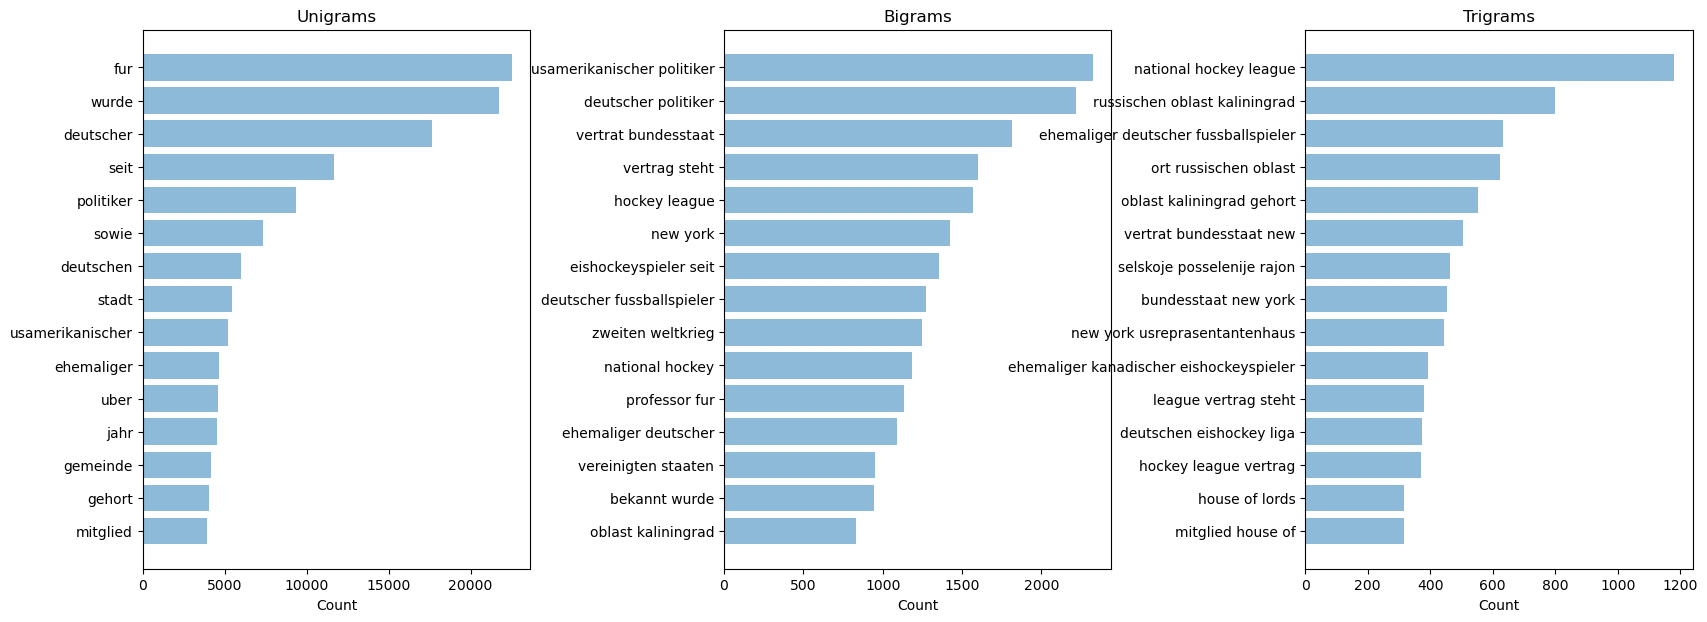

In [7]:
def textTrends(documents):
    cleanedSource = cleanSource(documents)
    plotNgrams(cleanedSource)
    
textTrends(df['summary'])